#SECK Mouhamadou Abdoulaye

In [1]:
#!git clone https://github.com/megvii-research/NAFNet
#%cd NAFNet

In [1]:
%cd NAFNet

/home/jovyan/work/nafnet_doc/NAFNet


In [2]:
#!git clone https://github.com/Mas2205/D-bruitage.git

In [3]:
#!pip install -r requirements.txt
!pip install --upgrade --no-cache-dir gdown
!python setup.py develop --no_cuda_ext

fatal: detected dubious ownership in repository at '/home/jovyan/work/nafnet_doc/NAFNet'
To add an exception for this directory, call:

	git config --global --add safe.directory /home/jovyan/work/nafnet_doc/NAFNet
/opt/conda/lib/python3.10/site-packages/setuptools/dist.py:544: UserWarning: The version specified ('1.2.0+') is an invalid version, this may not work as expected with newer versions of setuptools, pip, and PyPI. Please see PEP 440 for more details.
  warnings.warn(
running develop
/opt/conda/lib/python3.10/site-packages/setuptools/command/easy_install.py:144: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 1.2.0- is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/setuptools/command/install.py:34: SetuptoolsDeprecati

In [4]:
import gdown
#gdown.download('https://drive.google.com/uc?id=14Fht1QQJ2gMlk4N1ERCRuElg8JfjrWWR', "./experiments/pretrained_models/", quiet=False)

In [5]:
#!pip install image_slicer

In [6]:
#torch._C._cuda_init()

In [7]:
from skimage import io, color
from basicsr.models import create_model
from basicsr.utils import img2tensor as _img2tensor, tensor2img, imwrite
from basicsr.utils.options import parse
import torch
import image_slicer
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import shutil
import glob


/opt/conda/lib/python3.10/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 8.1.2. Several security issues (CVE-2021-27921, CVE-2021-25290, CVE-2021-25291, CVE-2021-25293, and more) have been fixed in pillow 8.1.2 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [8]:
def regroupe(dec):
  res=[]
  az = list(range(len(dec)))
  j=0
  aa=az[::int(np.sqrt(len(dec)))]
  aa.append(len(dec))
  for i in range(len(aa)-1):
    res.append(np.concatenate((dec[j:aa[i+1]]),axis =1))
    j=aa[i+1]
  image = np.concatenate((res),axis = 0)
  return image


def recup(img):
  out_t = img.copy()
  new = color.rgb2gray(out_t)
  return new


def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img
def img2tensor(img, bgr2rgb=False, float32=True):
    img = img.astype(np.float32) / 255.
    return _img2tensor(img, bgr2rgb=bgr2rgb, float32=float32)

def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('NAFNet output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)

def single_image_inference(model, img, save_path):
      model.feed_data(data={'lq': img.unsqueeze(dim=0)})

      if model.opt['val'].get('grids', False):
          model.grids()

      model.test()

      if model.opt['val'].get('grids', False):
          model.grids_inverse()

      visuals = model.get_current_visuals()
      sr_img = tensor2img([visuals['result']])
      imwrite(sr_img, save_path)


In [9]:
opt_path = 'options/test/SIDD/NAFNet-width64.yml'
opt = parse(opt_path, is_train=False)
opt['dist'] = False
NAFNet = create_model(opt)

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

(2048, 2048)


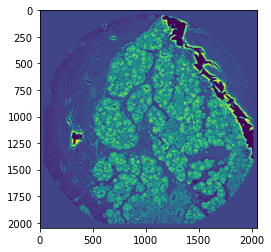

In [9]:
input_path='/content/NAFNet/D-bruitage/img6.tif'
im = plt.imread(input_path)
#im = np.reshape(im,(im.shape[0],im.shape[1],1))
print(im.shape)
plt.imshow(im)

In [10]:

uploadd_folder = 'seck/image'
upload_folder = 'seck/input'
result_folder = 'seck/output'
result_inp = 'seck/dec_inp'
result_out = 'seck/dec_out'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
if os.path.isdir(uploadd_folder):
    shutil.rmtree(uploadd_folder)
if os.path.isdir(result_inp):
    shutil.rmtree(result_inp)
if os.path.isdir(result_out):
    shutil.rmtree(result_out)
os.makedirs(upload_folder)
os.makedirs(uploadd_folder)
os.makedirs(result_folder)
os.makedirs(result_inp)
os.makedirs(result_out)

In [11]:
input = "/content/NAFNet/seck/image/im_png.png"
plt.imsave(input, im)

b=image_slicer.slice(input,4)

a=[]
for i in b:
  a.append(plt.imread(i.filename))

for j,i in zip("abcdefghijklmnopqrstuvwxyz",range(len(a))):
  mpimg.imsave(f"/content/NAFNet/seck/input/resultat{j}.png", a[i])

In [12]:
import glob
input_list = sorted(glob.glob(os.path.join(upload_folder, '*')))
for input_path in input_list:
  img_input = imread(input_path)
  inp = img2tensor(img_input)
  output_path = os.path.join(result_folder, os.path.basename(input_path))
  single_image_inference(NAFNet, inp, output_path)

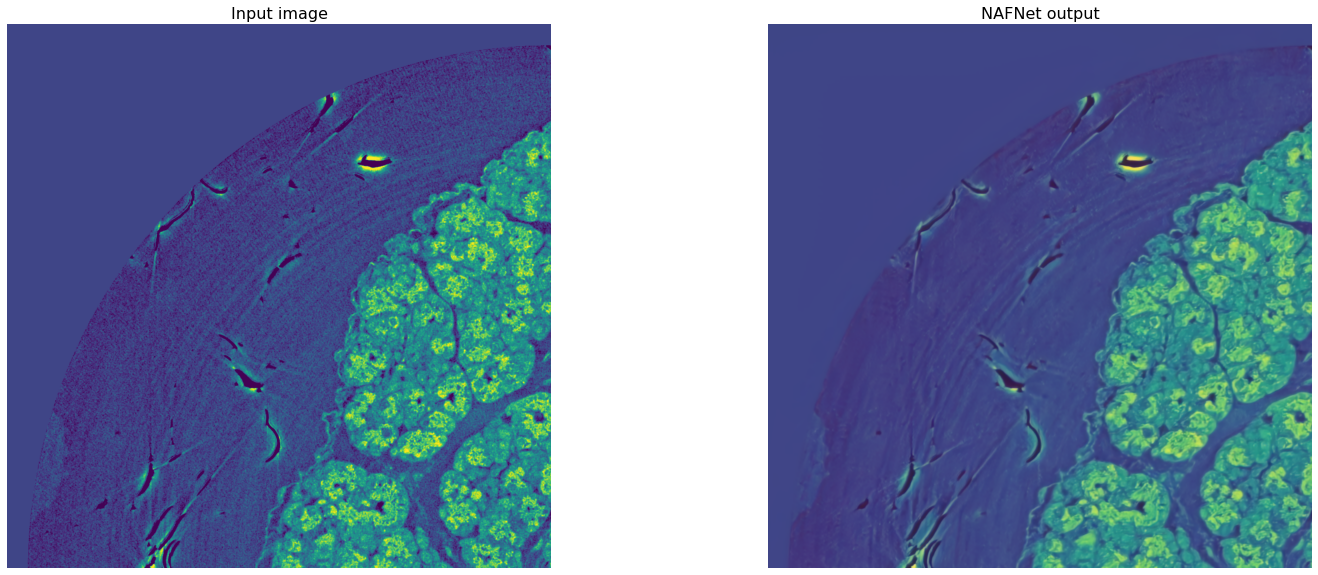

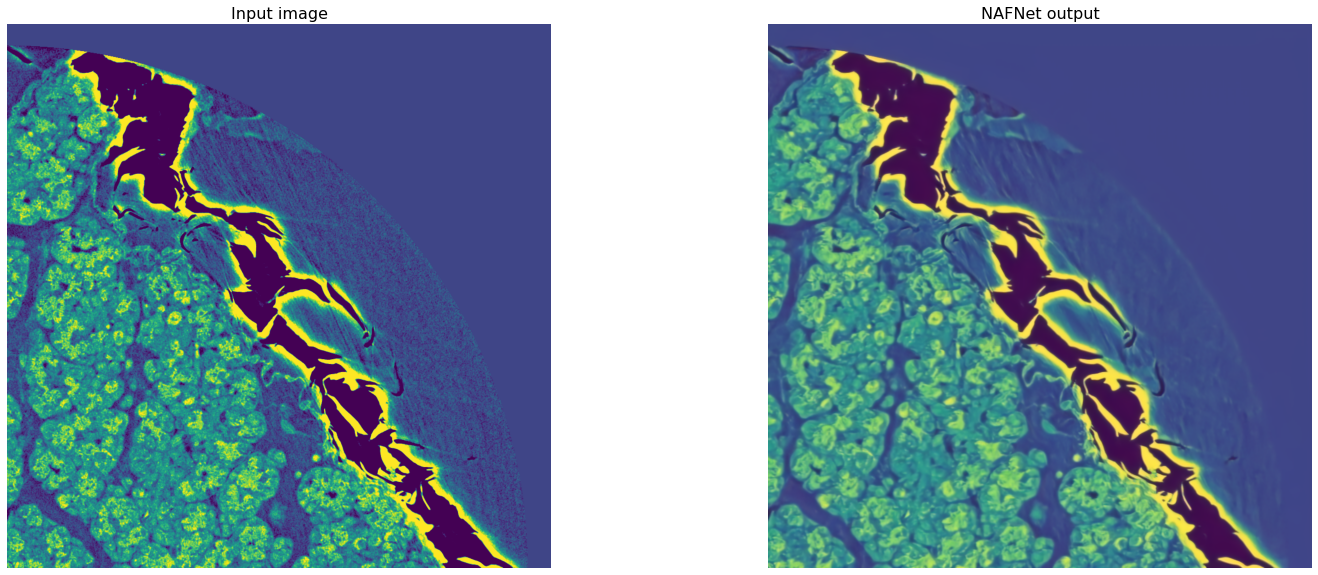

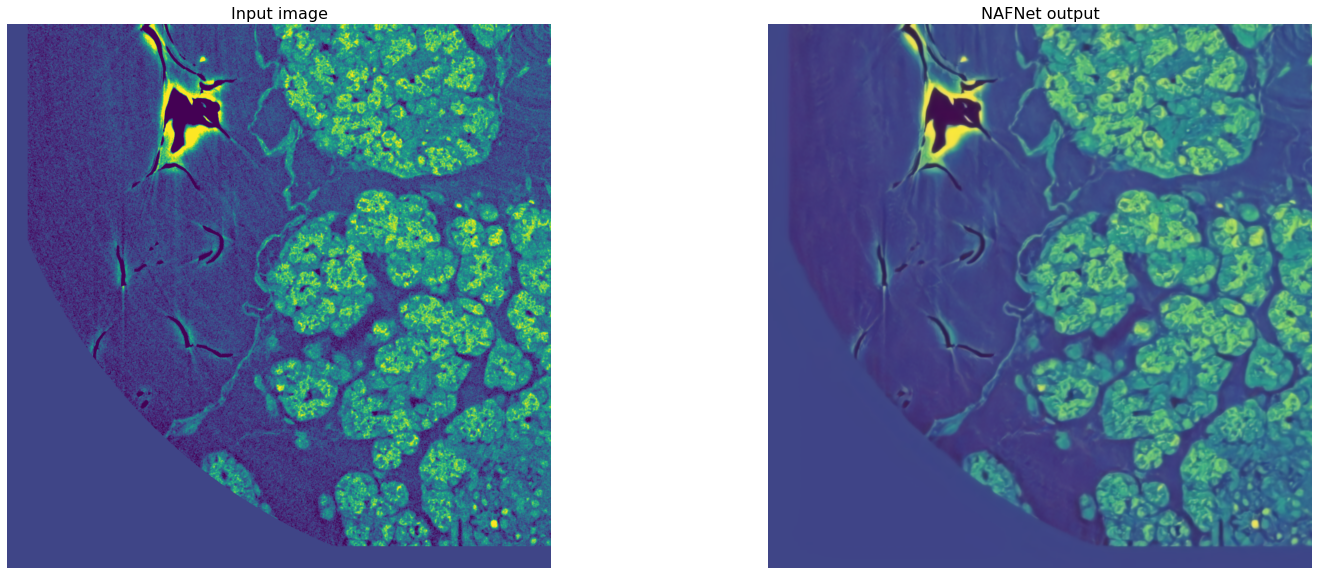

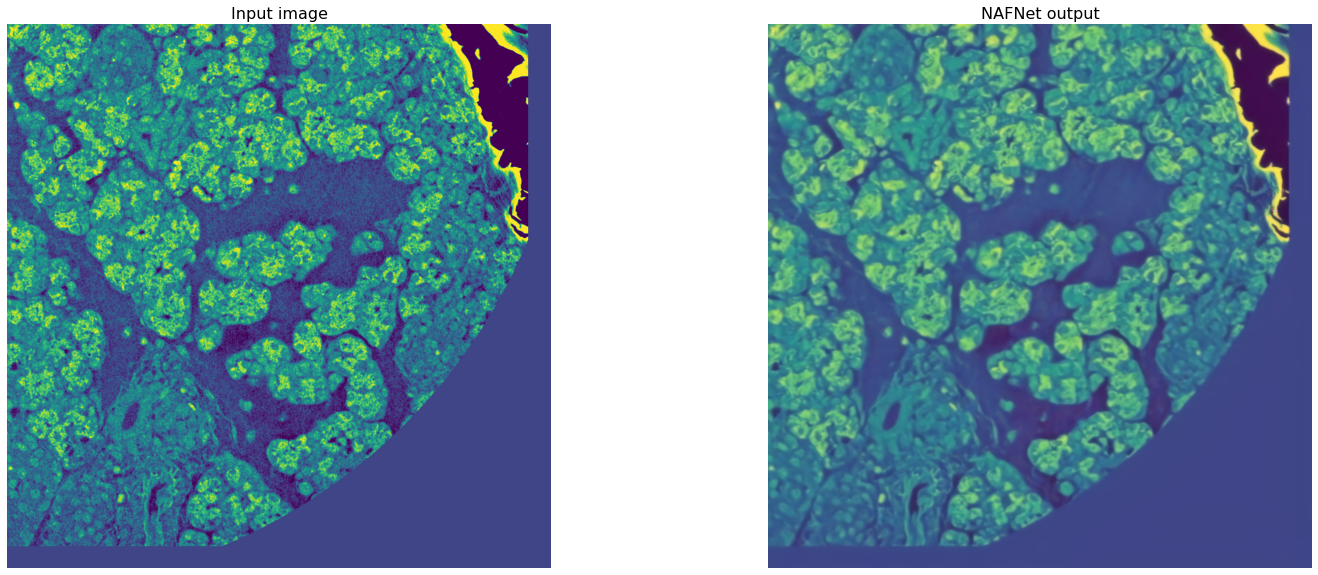

In [13]:
# visualize
inp=[]
out=[]
input_list = sorted(glob.glob(os.path.join(upload_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  out.append(img_output)
  inp.append(img_input)
  display(img_input, img_output)

In [14]:
for j,i in zip("abcdefghijklmnopqrstuvwxyz",range(len(inp))):
  mpimg.imsave(f"/content/NAFNet/seck/dec_inp/inp{j}.tiff", inp[i])
  mpimg.imsave(f"/content/NAFNet/seck/dec_out/out{j}.tiff", out[i])

In [15]:
dec=[]
for i in range(len(output_list)):
  dec.append(plt.imread(output_list[i]))

In [16]:
images = regroupe(dec)
new_out_np = recup(images) 

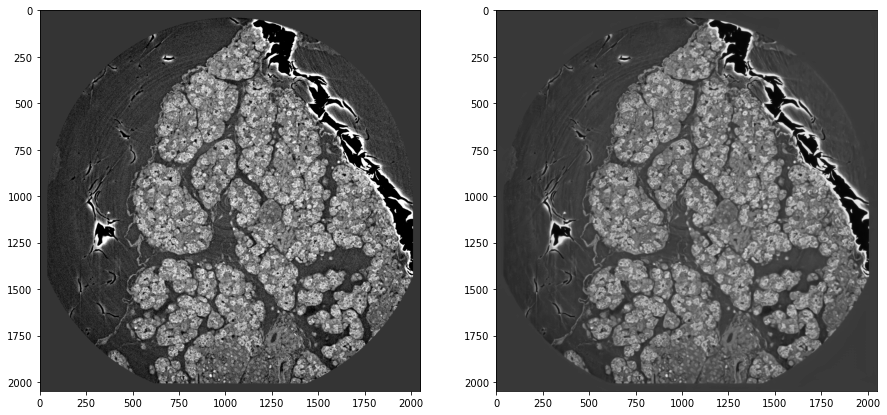

In [17]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(im,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(new_out_np,cmap='gray')

In [18]:
plt.imsave(f"/content/NAFNet/seck/output/resultat.tiff", new_out_np,cmap='gray')
plt.imsave(f"/content/NAFNet/seck/output/orig.tiff", im,cmap='gray')